In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Ensure plots show inline
%matplotlib inline

In [3]:
#Load metadata.csv
df =pd.read_csv("metadata.csv", low_memory=False, nrows=10000)

#First five rows of the dataframe
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
#Dimensions
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (10000, 19)


In [5]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          10000 non-null  object 
 1   sha               9010 non-null   object 
 2   source_x          10000 non-null  object 
 3   title             10000 non-null  object 
 4   doi               10000 non-null  object 
 5   pmcid             10000 non-null  object 
 6   pubmed_id         10000 non-null  int64  
 7   license           10000 non-null  object 
 8   abstract          7855 non-null   object 
 9   publish_time      10000 non-null  object 
 10  authors           9406 non-null   object 
 11  journal           9953 non-null   object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          0 non-null      float64
 15  pdf_json_files    9010 non-null   object 
 16  pmc_json_files    6782 non-null   object 

In [8]:
#Show first ten columns with missing counts
df.isnull().sum().head(10)

cord_uid           0
sha              990
source_x           0
title              0
doi                0
pmcid              0
pubmed_id          0
license            0
abstract        2145
publish_time       0
dtype: int64

In [9]:
#Summary Statistics
df.describe()

,pubmed_id,mag_id,who_covidence_id,arxiv_id,s2_id
count,1.000000e+04,0.0,0.0,0.0,0.0
mean,2.246508e+07,NaN,NaN,NaN,NaN
std,9.059700e+06,NaN,NaN,NaN,NaN
min,2.142000e+03,NaN,NaN,NaN,NaN
25%,1.717034e+07,NaN,NaN,NaN,NaN
50%,2.493047e+07,NaN,NaN,NaN,NaN
75%,3.011512e+07,NaN,NaN,NaN,NaN
max,3.238719e+07,NaN,NaN,NaN,NaN


In [10]:
#Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [11]:
#Extract year from publish_time
df['year'] = df['publish_time'].dt.year
df[['publish_time', 'year']].head()

,publish_time,year
0,2001-07-04,2001.0
1,2000-08-15,2000.0
2,2000-08-25,2000.0
3,2001-02-22,2001.0
4,2001-05-11,2001.0


In [12]:
#Fill missing journal with 'Unknown'
df['journal'] = df['journal'].fillna('Unknown')

In [13]:
#Add absract word count column
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))

#Check it
df[['abstract', 'abstract_word_count']].head()

,abstract,abstract_word_count
0,OBJECTIVE: This retrospective chart review des...,262
1,Inflammatory diseases of the respiratory tract...,142
2,Surfactant protein-D (SP-D) participates in th...,219
3,Endothelin-1 (ET-1) is a 21 amino acid peptide...,68
4,Respiratory syncytial virus (RSV) and pneumoni...,110


In [14]:
#Drop rows missing title or publish_time
df_clean = df.dropna(subset=['title', 'publish_time'])

#Shape before and after cleaning
print("Before cleaning:", df.shape)
print("After cleaning:", df_clean.shape)

Before cleaning: (10000, 21)
After cleaning: (9078, 21)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

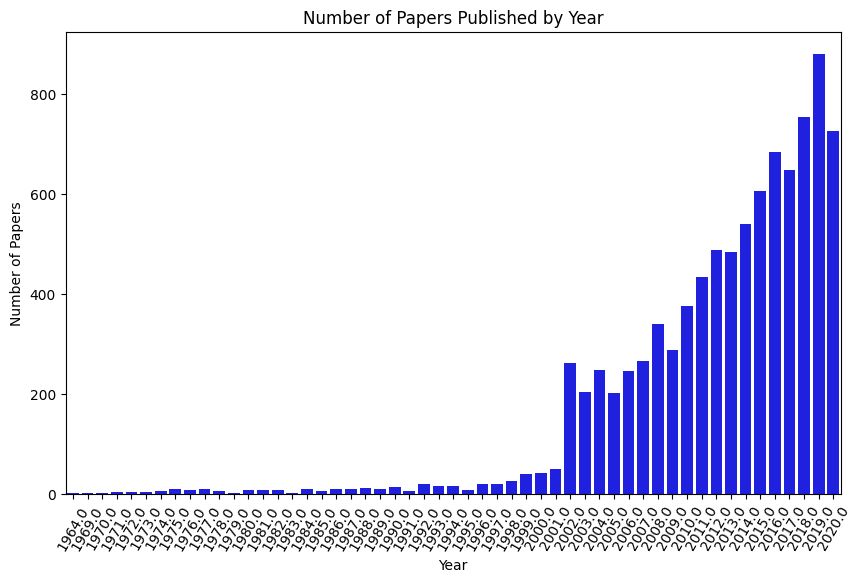

In [27]:
#Count papers by year
year_counts = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=year_counts.index, y=year_counts.values, color="blue")
plt.title("Number of Papers Published by Year") 
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=60)
plt.show()

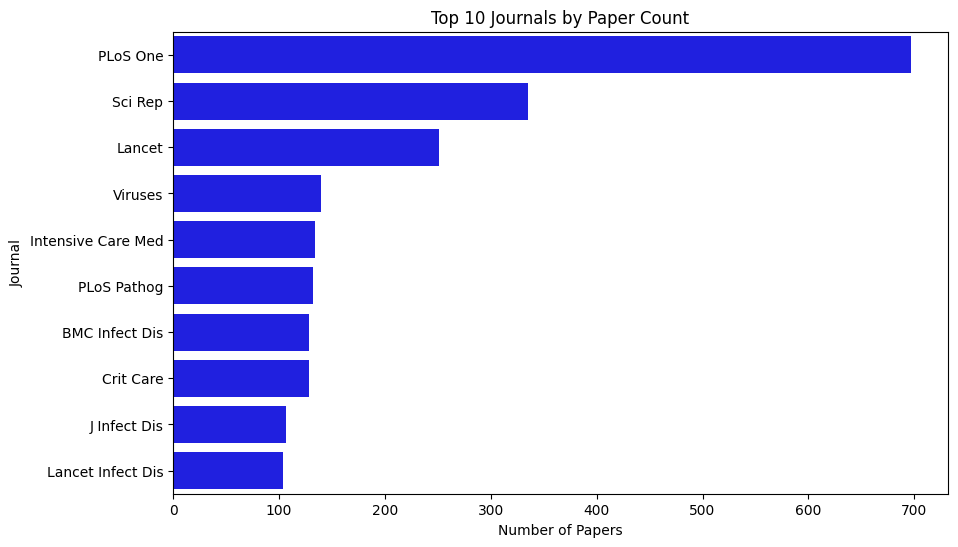

In [34]:
#Top 10 journals by paper count
top_journals = df_clean['journal'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, color="blue")
plt.title("Top 10 Journals by Paper Count")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")   
plt.show()

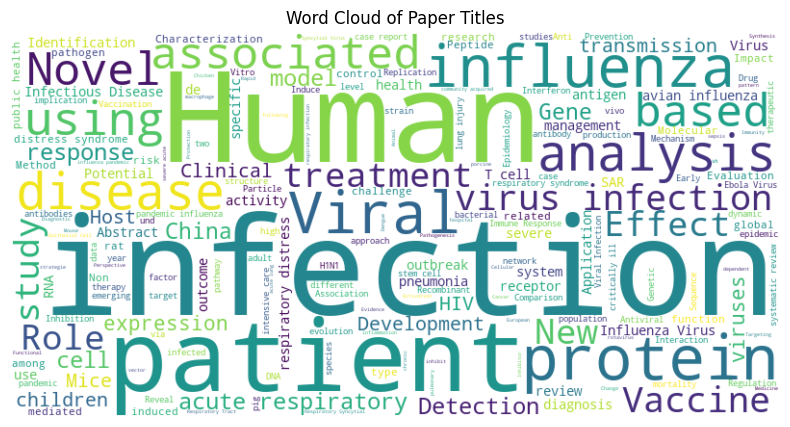

In [36]:
#Combine all titles into one string 
text = " ".join(df_clean['title'].dropna().tolist())

#Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.title("Word Cloud of Paper Titles") 
plt.show()

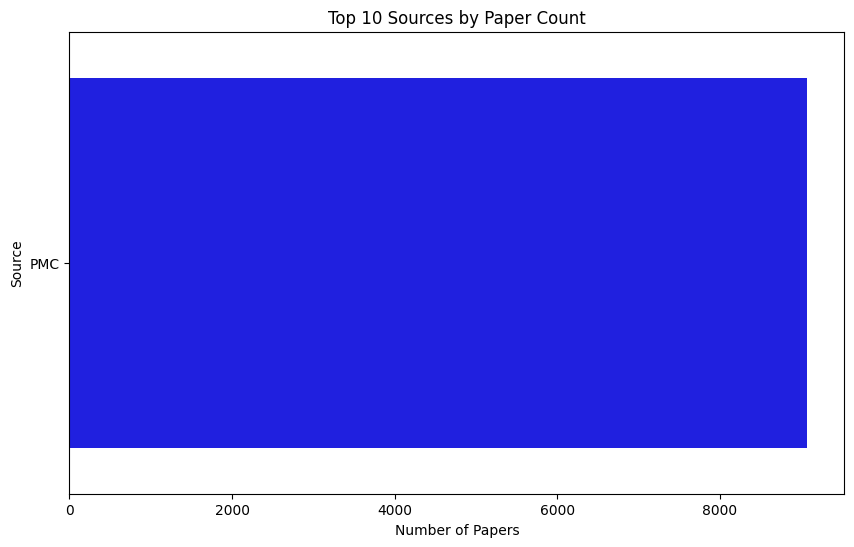

In [ ]:
#Top 10 sources
source_counts = df_clean['source_x'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=source_counts.values, y=source_counts.index, color="blue")
plt.title("Top 10 Sources by Paper Count")
plt.xlabel("Number of Papers")      
plt.ylabel("Source")
plt.show()